## Setup:

In [1]:
#!git clone https://github.com/mat10d/EvolvePro.git
#%cd EvolvePro/

In [2]:
#%%capture

#!pip install pandas numpy scikit-learn scikit-learn-extra xgboost matplotlib seaborn biopython scipy torch fair-esm
from pathlib import Path
Path('./output').mkdir(parents=True, exist_ok=True)

## Process

In [3]:
from evolvepro.src.process import generate_wt, generate_single_aa_mutants
from pathlib import Path

output_dir = Path('/home/nikolenko/work/mipt/EvolvePro/data/dms/wt_fasta')
wt_fasta = output_dir / 'kelsic_WT.fasta'
mutants_fasta = Path('output') / 'kelsic.fasta'

generate_wt('MAKEDNIEMQGTVLETLPNTMFRVELENGHVVTAHISGKMRKNYIRILTGDKVTVELTPYDLSKGRIVFRSR', output_file=wt_fasta)
generate_single_aa_mutants(wt_fasta, output_file=mutants_fasta)

Number of mutants: 1369


In [4]:
from evolvepro.src.process import suggest_initial_mutants
#TODO поменять сид
suggest_initial_mutants('output/kelsic.fasta', num_mutants=12, random_seed=None)


Suggested 12 mutants for testing:
1. D51L
2. P18F
3. L14E
4. T20I
5. D51M
6. N19S
7. A2Y
8. H30T
9. K64Y
10. T49M
11. G50L
12. R41N


## PLM

In [5]:
import torch
print(f"GPU available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name()}")

#КАК АНСАМБЛЬ?
#или другое esm

# ESM-1b 
# !CUDA_VISIBLE_DEVICES=7 ~/miniforge/envs/plm/bin/python ../evolvepro/plm/esm/extract.py esm1b_t33_650M_UR50S content/output/kelsic.fasta content/output/kelsic_esm1b_t33_650M_UR50S --toks_per_batch 512 --include mean --concatenate_dir content/output
!CUDA_VISIBLE_DEVICES=6 ~/miniforge/envs/plm/bin/python ../evolvepro/plm/esm/extract.py esm2_t6_8M_UR50D content/output/kelsic.fasta content/output/kelsic_esm2_t48_15B_UR50D --toks_per_batch 512 --include mean --concatenate_dir content/output

#!CUDA_VISIBLE_DEVICES=6 ~/miniforge/envs/plm/bin/python ../evolvepro/plm/esm/extract.py esm2_t48_15B_UR50D content/output/kelsic.fasta content/output/kelsic_esm2_t48_15B_UR50D --toks_per_batch 512 --include mean --concatenate_dir content/output


GPU available: True
GPU device: NVIDIA A100-PCIE-40GB
Transferred model to GPU
Read content/output/kelsic.fasta with 1369 sequences
Processing 1 of 196 batches (7 sequences)
Device: cuda:0
Processing 2 of 196 batches (7 sequences)
Device: cuda:0
Processing 3 of 196 batches (7 sequences)
Device: cuda:0
Processing 4 of 196 batches (7 sequences)
Device: cuda:0
Processing 5 of 196 batches (7 sequences)
Device: cuda:0
Processing 6 of 196 batches (7 sequences)
Device: cuda:0
Processing 7 of 196 batches (7 sequences)
Device: cuda:0
Processing 8 of 196 batches (7 sequences)
Device: cuda:0
Processing 9 of 196 batches (7 sequences)
Device: cuda:0
Processing 10 of 196 batches (7 sequences)
Device: cuda:0
Processing 11 of 196 batches (7 sequences)
Device: cuda:0
Processing 12 of 196 batches (7 sequences)
Device: cuda:0
Processing 13 of 196 batches (7 sequences)
Device: cuda:0
Processing 14 of 196 batches (7 sequences)
Device: cuda:0
Processing 15 of 196 batches (7 sequences)
Device: cuda:0
Process

## Run EVOLVEpro

In [16]:
from evolvepro.src.evolve import evolve_experimental

protein_name = 'kelsic'
embeddings_base_path = 'content/output'
embeddings_file_name = 'kelsic_esm2_t6_8M_UR50D.csv'
round_base_path = 'rounds_data'
wt_fasta_path = "/home/nikolenko/work/mipt/EvolvePro/data/dms/wt_fasta/kelsic_WT.fasta"
number_of_variants = 12
output_dir = 'content/output'
rename_WT = False

In [17]:
!ls rounds_data

kelsic_Round1.xlsx  kelsic_Round3.xlsx	kelsic_Round5.xlsx
kelsic_Round2.xlsx  kelsic_Round4.xlsx


#### Round 1

In [18]:
round_name = 'Round1'
round_file_names = ['kelsic_Round1.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round1


Embeddings loaded: (1369, 320)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
iteration shape: (12, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1357,)

Tested variants in this round: 12
429      E4Y
439     G38E
453     D61W
528     T58E
590     I36D
616      I7A
813     R23N
849      E4M
917     R23K
1061    V31C
1172    Q10P
1242     K3F
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
752     E27C  0.945450       NaN              NaN              NaN   
1173    E15C  0.938595       NaN              NaN              NaN   
1109    E15N  0.932942       NaN              NaN              NaN   
325     T20C  0.932722       NaN              NaN              NaN   
797     A34C  0.932450       NaN              NaN              NaN   
639      D5H  0.930095       NaN              NaN              NaN   
1001    T49I  0.929583       NaN              NaN              NaN   


/home/nikolenko/work/mipt/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 2

In [19]:
round_name = 'Round2'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round2
Embeddings loaded: (1369, 320)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
iteration shape: (24, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1345,)

Tested variants in this round: 24
104     T12M
314      E4V
429      E4Y
439     G38E
453     D61W
528     T58E
590     I36D
616      I7A
679     T12C
717      D5M
753      E8C
759      E4Q
813     R23N
849      E4M
910      E4L
917     R23K
1061    V31C
1090     E4F
1129     E4H
1172    Q10P
1219    S71C
1239     E4N
1242     K3F
1267     E8Q
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
822      D5F  0.990682       NaN              NaN              NaN   
1339     D5C  0.986090       NaN              NaN              NaN   
703      D5Q  0.981062       NaN              NaN              NaN   
1109    E15N  0.978002       NaN        

/home/nikolenko/work/mipt/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 3

In [20]:
round_name = 'Round3'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round3
Embeddings loaded: (1369, 320)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
iteration shape: (36, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1333,)

Tested variants in this round: 36
104     T12M
276      M1W
314      E4V
429      E4Y
439     G38E
453     D61W
484      E4I
528     T58E
590     I36D
616      I7A
634      D5I
679     T12C
717      D5M
747      D5V
753      E8C
759      E4Q
777     E25Q
804      D5N
813     R23N
822      D5F
849      E4M
910      E4L
917     R23K
1061    V31C
1090     E4F
1128     D5Y
1129     E4H
1162     E4C
1172    Q10P
1219    S71C
1239     E4N
1242     K3F
1267     E8Q
1309     E4W
1316     D5L
1339     D5C
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
639      D5H  1.018804       NaN     

/home/nikolenko/work/mipt/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 4

In [21]:
round_name = 'Round4'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round4
Embeddings loaded: (1369, 320)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
Loaded experimental data for kelsic_Round4.xlsx: (12, 3)
iteration shape: (48, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1321,)

Tested variants in this round: 48
19      E27M
26       E4T
43       D5S
104     T12M
238     M21L
276      M1W
314      E4V
425     V24I
429      E4Y
439     G38E
453     D61W
478      D5T
484      E4I
528     T58E
590     I36D
616      I7A
634      D5I
639      D5H
679     T12C
703      D5Q
717      D5M
747      D5V
752     E27C
753      E8C
759      E4Q
777     E25Q
804      D5N
813     R23N
822      D5F
849      E4M
886     E27L
910      E4L
917     R23K
1061    V31C
1090     E4F
1128     D5Y
1129     E4H
1162     E4C
1172    Q10P
1219    S71C
1239     E4N
1242     K3F
1248     D5A
1267     E8Q
1284    E27Q
130

/home/nikolenko/work/mipt/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


#### Round 5

In [22]:
round_name = 'Round5'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx', 'kelsic_Round5.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing kelsic - Round5
Embeddings loaded: (1369, 320)
Loaded experimental data for kelsic_Round1.xlsx: (12, 3)
Loaded experimental data for kelsic_Round2.xlsx: (12, 3)
Loaded experimental data for kelsic_Round3.xlsx: (12, 3)
Loaded experimental data for kelsic_Round4.xlsx: (12, 3)
Loaded experimental data for kelsic_Round5.xlsx: (12, 3)
iteration shape: (60, 2)
Labels shape: (1369, 5)
Embeddings and labels are aligned
(1309,)

Tested variants in this round: 60
19      E27M
26       E4T
43       D5S
104     T12M
218      D5P
238     M21L
273      D5W
276      M1W
314      E4V
425     V24I
429      E4Y
439     G38E
453     D61W
478      D5T
484      E4I
528     T58E
572     Q10H
580      E4P
590     I36D
614      E8K
616      I7A
634      D5I
639      D5H
679     T12C
703      D5Q
717      D5M
747      D5V
752     E27C
753      E8C
759      E4Q
763     T20H
777     E25Q
804      D5N
813     R23N
814      E4S
822      D5F
849      E4M
886     E27L
891     V55I
910      E4L
917     R23

/home/nikolenko/work/mipt/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


## Plot

In [23]:
from evolvepro.src.plot import read_exp_data, plot_variants_by_iteration

round_base_path = 'rounds_data'
round_file_names = ['kelsic_Round1.xlsx', 'kelsic_Round2.xlsx', 'kelsic_Round3.xlsx', 'kelsic_Round4.xlsx', 'kelsic_Round5.xlsx']
wt_fasta_path = "/home/nikolenko/work/mipt/EvolvePro/data/dms/wt_fasta/kelsic_WT.fasta"

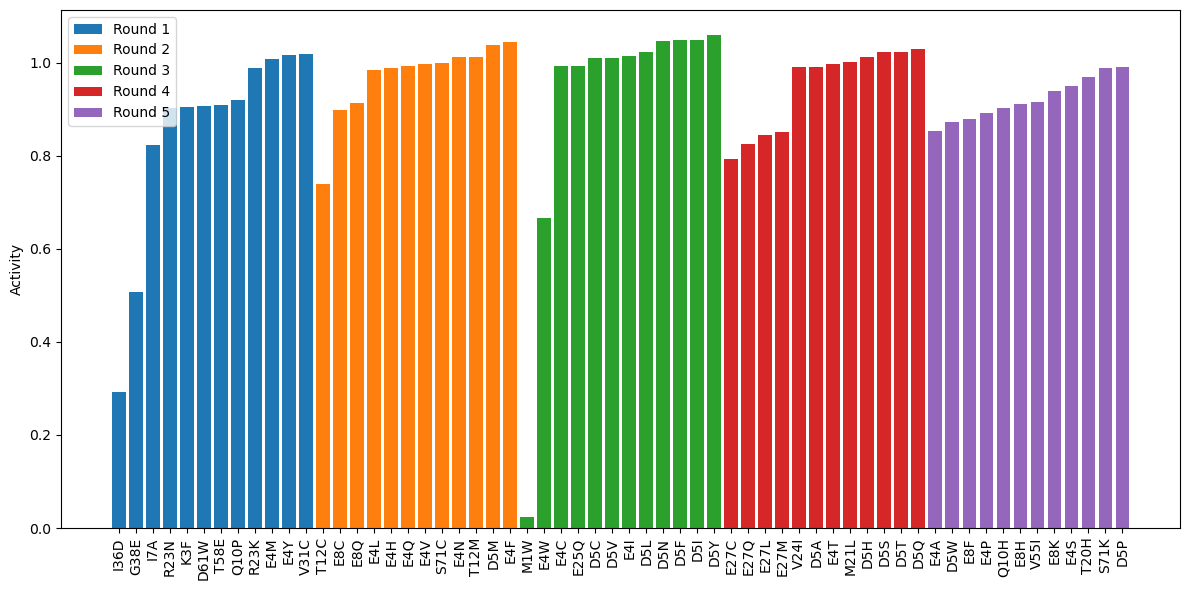

In [24]:
df = read_exp_data(round_base_path, round_file_names, wt_fasta_path)
plot_variants_by_iteration(df, activity_column='activity', output_dir=output_dir, output_file="kelsic")


In [25]:
# соотнести белки и найти хороший 
# найти ещё датасет с одиночными мутациями для какого то белка 
# и на нем запустить этот алгоритм 